## 1

Given (n,k) (denoted as 1) and (k,m) (denoted as 2)  

Every row of (n,k) matrix would be having dot-product with all the columns of every column of (k,m) matrix.  
Total no. of rows in (n,k): **n**  
Total no. of columns in (k,m): **m**  
In each row there are k elements in (1) and in each column in (2) there are k elements. So there should total multiplications = k and total additions = **k-1**  
So total additions and multiplications for 1 pair(consisting of a row of (1) and a column of (2)) are: **k-1** and **k** respectively.  

Total no. of pairs = **nm**  

Therefore total no. of additions and multiplications are: **nm(k-1)** and **nmk** respectively


## 2

### Using Nested list

In [5]:
# Func to find a vertical col of index: col_idx of the matrix2/mat2
def col_m2(mat, col_idx):
    lst = []
    for i in mat:
        lst += [i[col_idx]]
    return lst

def multiply2lists(l1, l2):
    ans = 0
    for i in range(len(l1)):
        ans +=l1[i]*l2[i]
    return ans

In [6]:
m1 = [[2, 3, 4],
      [5, 1, 2]]

m2 = [[1, 2, 7, 1],
      [8, 9, 1, 2],
      [5, 1, 0, 0]]

# finding the dimensions of result matrix (=mat1*mat2)
row, col = 0, 0
for i in m1:
    row += 1
col = len(m2[0])

mat = []
for i in range(row):
    temp_lst = []
    for j in range(col):
        temp_lst += [0]
    mat.append(temp_lst)

for i in range(len(m1)):
    row = m1[i]
    m2_cols = len(m2[0])
    for j in range(m2_cols):
        col = col_m2(m2, j)
        ans = multiply2lists(row, col)
        mat[i][j] = ans

print(mat)



[[46, 35, 17, 8], [23, 21, 36, 7]]


### Using np

In [7]:
m1 = np.array([[2, 3, 4],
               [5, 1, 2]])

m2 = np.array([[1, 2, 7, 1],
               [8, 9, 1, 2],
               [5, 1, 0, 0]])

row, col = m1.shape[0], m2.shape[1]
res = np.full((row, col), 0)

for i in range(row):
    for j in range(col):
        res[i][j] = np.dot(m1[i], m2[:, j])
print(res)
        

[[46 35 17  8]
 [23 21 36  7]]


## 3

In [8]:
import time
import numpy as np
start = time.time()

def find_n_lar(arr, maxx, largest):
    for ele in arr:
        if (ele>maxx and ele<largest):
            maxx = ele
    return maxx
# 
def nth_largest(arr, n):
    lar_arr = np.full(n, -np.inf)
    largest = max(arr)+1
    for i in range(len(lar_arr)):
        maxx = lar_arr[i]
        largest = find_n_lar(arr, maxx, largest)
        lar_arr[i] = largest
    return lar_arr[-1]
# 

arr = np.array([2, 4, 6, 1, 7, 8, 3])
if (len(arr)%2 == 0):
    n_lar = len(arr) - int(len(arr)/2-1)
else:
    n_lar = len(arr) - int(len(arr)/2)

res = nth_largest(arr, n_lar)
print(f"Median: {res}, But here the Time Complexity is O(n^2)")

end = time.time()
print("Time taken: {:.6f} seconds".format(end - start))

Median: 4.0, But here the Time Complexity is O(n^2)
Time taken: 0.001018 seconds


In [9]:
# Optimal Approach of TC = O(nlogn)
import time
start = time.time()

array = np.array([2, 4, 6, 1, 7, 8, 3])
arr = np.sort(array)
if (len(arr)%2 == 0):
    idx = int(len(arr)/2-1)
else:
    idx = int(len(arr)/2)
print(arr[idx])

end = time.time()
print("Time taken: {:.6f} seconds".format(end - start))

4
Time taken: 0.000998 seconds


In [10]:
import time
start = time.time()

arr = np.array([2, 4, 6, 1, 7, 8, 3])
print(np.median(arr))

end = time.time()
print("Time taken: {:.6f} seconds".format(end - start))

4.0
Time taken: 0.000350 seconds


## 4

$$
f = x^2 y + y^3 \sin(x) \\

f' (wrt x) = 2 x y + y^3 \cos(x) \\
f' (wrt y) = x^2 + 3 y^2 \cos(x) \\

$$

In [11]:
x, y = 1.0, 2.0
x1, y1 = 3.0, 4.0

df_dx = 2*x*y + y**3*np.cos(x)
df_dx1 = 2*x1*y1 + y1**3*np.cos(x1)

print(df_dx, df_dx1)

8.322418446945118 -39.35951978242851


## 5

In [12]:
# Using JAX verifying

import jax.numpy as jnp
from jax import grad
def func(x, y):
    return x**2*y + y**3*jnp.sin(x)

df_dx_1 = grad(func, argnums=0)(1.0, 2.0)
df_dx_2 = grad(func, argnums=0)(3.0, 4.0)
print(df_dx_1, df_dx_2)

8.322418 -39.35952


## 6

In [13]:
# Sympy is used to calculate the derivative of something also it could be checked analytically
import sympy as sp

x, y = sp.symbols('x y')
f = x**2*y + y**3*sp.sin(x)
l=[]
for var in (x, y):
    l+=[sp.diff(f, var)]

print(l)

[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


## 7

In [ ]:
dict = {
    2022: {
        "Branch1": [{"Roll number": 1, "Name": "A", "Marks": {
                        "Maths": 1, "English": 2
                    }
                }], 
        "Branch2": [{"Roll number": 2, "Name": "B", "Marks": {
                        "Maths": 3, "English": 4
                    }
                }]
    },
    2023: {
        "Branch1": [{"Roll number": 3, "Name": "C", "Marks": {
                        "Maths": 5, "English": 6
                    }
                }],
        "Branch2": [{"Roll number": 4, "Name": "D", "Marks": {
                        "Maths": 7, "English": 8
                    }
                }]
    }, 
    2024: {
        "Branch1": [{"Roll number": 5, "Name": "E", "Marks": {
                        "Maths": 9, "English": 10
                    }
                }],
        "Branch2": [{"Roll number": 6, "Name": "F", "Marks": {
                        "Maths": 11, "English": 12
                    }
                }]
    }, 
    2025: {
        "Branch1": [{"Roll number": 7, "Name": "G", "Marks": {
                        "Maths": 12, "English": 13
                    }
                }],
        "Branch2": [{"Roll number": 8, "Name": "H", "Marks": {
                        "Maths": 13, "English": 14
                    }
                }]
    }
}

dict

{2022: {'Branch1': [{'Roll number': 1,
    'Name': 'A',
    'Marks': {'Maths': 1, 'English': 2}}],
  'Branch2': [{'Roll number': 2,
    'Name': 'B',
    'Marks': {'Maths': 3, 'English': 4}}]},
 2023: {'Branch1': [{'Roll number': 3,
    'Name': 'C',
    'Marks': {'Maths': 5, 'English': 6}}],
  'Branch2': [{'Roll number': 4,
    'Name': 'D',
    'Marks': {'Maths': 7, 'English': 8}}]},
 2024: {'Branch1': [{'Roll number': 5,
    'Name': 'E',
    'Marks': {'Maths': 9, 'English': 10}}],
  'Branch2': [{'Roll number': 6,
    'Name': 'F',
    'Marks': {'Maths': 11, 'English': 12}}]},
 2025: {'Branch1': [{'Roll number': 7,
    'Name': 'G',
    'Marks': {'Maths': 12, 'English': 13}}],
  'Branch2': {'Roll number': 8,
   'Name': 'H',
   'Marks': {'Maths': 13, 'English': 14}}}}

## 8

In [33]:
class student:
    def __init__(self, rollnum, name, marks):
        self.rollnum = rollnum
        self.name = name
        self.marks = marks

class branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):  # FIXED
        self.students.append(student)

class year:
    def __init__(self, year):
        self.year = year
        self.branches = []
    
    def add_branch(self, branch):
        self.branches.append(branch)

database = []

year2022 = year(2022)

branch1_2022 = branch("Branch 1")
branch1_2022.add_student(student(1, "N", {"Maths": 100, "English": 70}))
branch1_2022.add_student(student(2, "M", {"Maths": 95, "English": 80}))

branch2_2022 = branch("Branch 2")
branch2_2022.add_student(student(3, "K", {"Maths": 85, "English": 75}))

year2022.add_branch(branch1_2022)
year2022.add_branch(branch2_2022)

database.append(year2022)

year2023 = year(2023)

branch1_2023 = branch("Branch 1")
branch1_2023.add_student(student(4, "A", {"Maths": 90, "English": 88}))
branch2_2023 = branch("Branch 2")
branch2_2023.add_student(student(5, "B", {"Maths": 75, "English": 68}))

year2023.add_branch(branch1_2023)
year2023.add_branch(branch2_2023)

database.append(year2023)

## 9

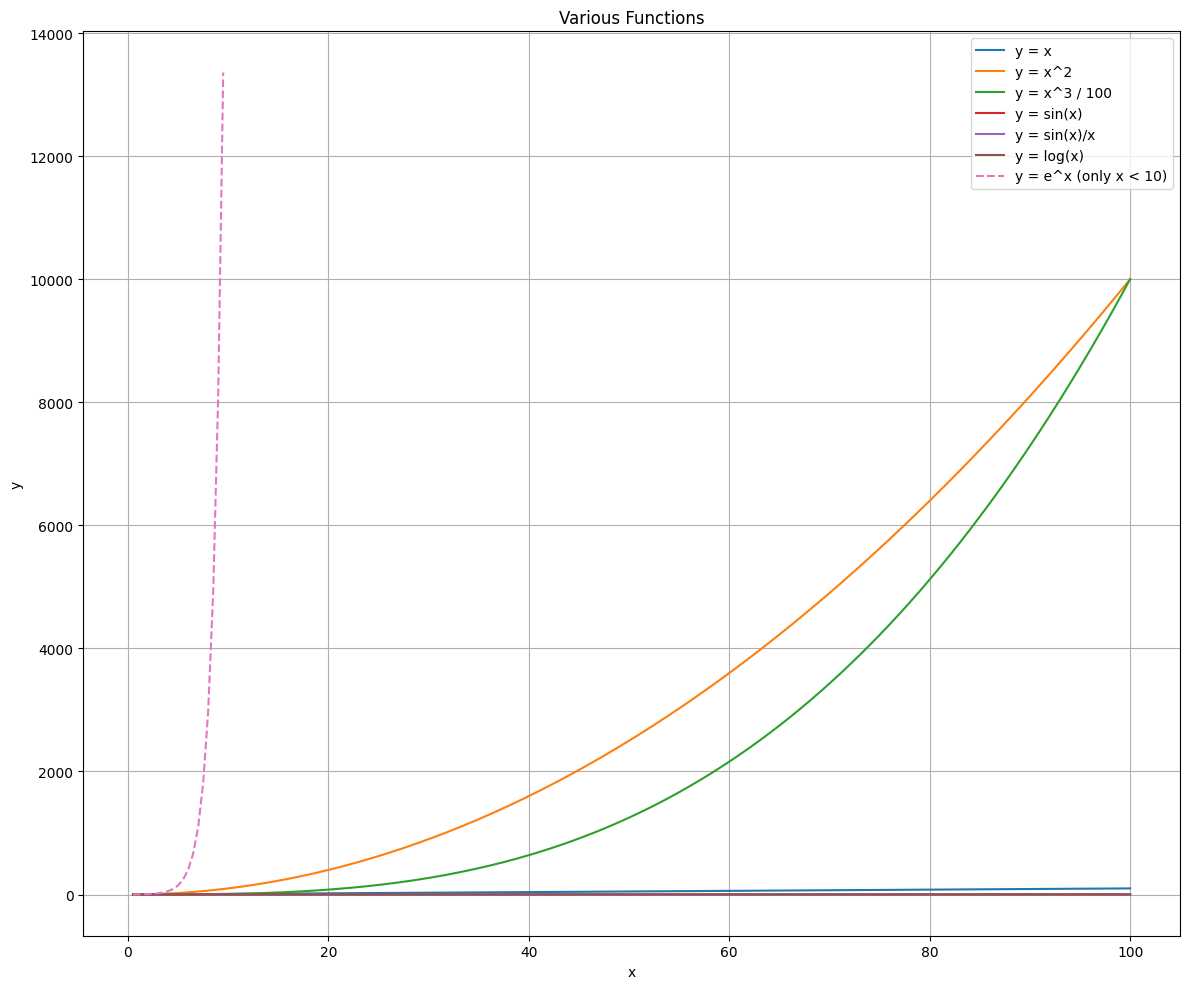

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(12, 10))

plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = x^2')
plt.plot(x, y3, label='y = x^3 / 100')
plt.plot(x, y4, label='y = sin(x)')
plt.plot(x, y5, label='y = sin(x)/x')
plt.plot(x, y6, label='y = log(x)')
plt.plot(x[x < 10], y7[x < 10], label='y = e^x (only x < 10)', linestyle='--')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Various Functions")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


## 10

In [71]:
vals = np.random.uniform(1, 2, 100)
mat = np.random.choice(vals, size=(20, 5))
import pandas as pd
df = pd.DataFrame(data=mat)
df.columns = ["a", "b", "c", "d", "e"]   # Used to rename all the columns
df.head()

,a,b,c,d,e
0,1.733381,1.522349,1.474551,1.776803,1.253951
1,1.908804,1.859730,1.113399,1.333395,1.929145
2,1.644957,1.486259,1.708275,1.749321,1.871569
3,1.308334,1.769333,1.283596,1.231867,1.522349
4,1.749321,1.396454,1.733381,1.612517,1.052867


## 11

In [65]:
df["f"] = df["a"]+df["b"]+df["c"]+df["d"]+df["e"]
df["g"] = np.where(df["f"]<8, "LT8", "GT8")
print(f"number of rows in the dataframe where the value in the column 'g' is 'LT8' is:  {len(df[df["g"]=="LT8"])}")
np.std(df["f"])

number of rows in the dataframe where the value in the column 'g' is 'LT8' is:  17


np.float64(0.45783928531587714)

## 12

In [67]:
a = np.array([1, 2, 3])

b = np.array([[10, 20, 30],
              [40, 50, 60]])

result = b + a

print("Array a (1D):")
print(a)

print("\nArray b (2D):")
print(b)

print("\nResult of b + a (broadcasting):")
print(result)


Array a (1D):
[1 2 3]

Array b (2D):
[[10 20 30]
 [40 50 60]]

Result of b + a (broadcasting):
[[11 22 33]
 [41 52 63]]


## 13

In [72]:
# np.argmin from scratch
arr = np.array([2, 5, 1, 2, 8, 5, 9, 4])
min_index = 0
min_value = arr[0]
for i in range(1, len(arr)):
    if arr[i] < min_value:
        min_value = arr[i]
        min_index = i
print(min_index)


print(np.argmin(arr))

2
2
